In [32]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create XOR problem
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,0])

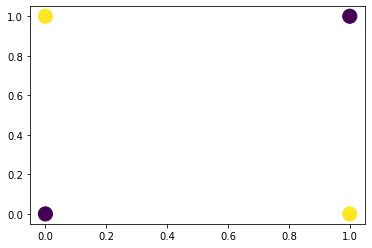

In [3]:
# Visualizing problem
plt.scatter(X[:,0], X[:,1], c=Y, s=200)
plt.show()

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
def tanh(z):
    return (np.exp(z)-np.exp(-z)) / (np.exp(z)+np.exp(-z))

In [6]:
def cost(y,yhat):
    return -np.sum(y*np.log(yhat)+(1-y)*np.log(1-yhat))

In [190]:
def relu(z):
    return z*(z>0)

In [7]:
def forward(x,w1,w2,b1,b2,activation):
    z1 = np.dot(x,w1)+b1
    a = z1*(z1>0)
    z2 = np.dot(a,w2)+b2
    yhat = sigmoid(z2)
    return a,yhat

In [260]:
def train(x, y, H, activation, lr, iterations,s):
    np.random.seed(s)
    N = x.shape[0]
    D = x.shape[1]
    w2 = np.random.randn(H)
    b1 = np.random.randn(H)
    w1 = np.random.randn(D,H)
    b2 = np.random.randn(1)
    c = []
    
    for i in range(iterations):
        a,yhat = forward(x,w1,w2,b1,b2,activation) # forward pass
        error2 = y-yhat # Last layer error
        gradient2 = error2 # Last Layer error gradient
        error1 = np.outer(gradient2,w2) # middle layer error
        gradient1 = error1*(a>0) # middle layer error gradient

        # Weights update
        w1 += lr*np.dot(x.T, gradient1)
        w2 += lr*np.dot(a.T, gradient2)
        
        b1 += lr*gradient1.sum(axis=0)
        b2 += lr*gradient2.sum(axis=0)
        
        # cost
        c.append(cost(y,yhat.reshape(-1))) # cost at each iteration
        
    return np.round(yhat),c, w1,w2,b1,b2

In [262]:
H = 3
activation = relu
lr = 0.1
iterations = 1000
s=1

yhat, c, w1, w2, b1, b2 = train(X,Y,H,activation,lr,iterations,s)

In [263]:
print("Accuracy: ", np.mean(Y==yhat))

Accuracy:  1.0


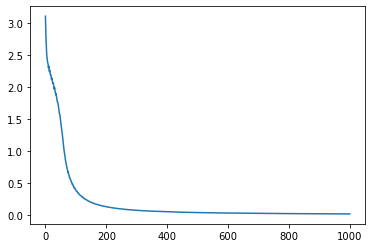

In [264]:
plt.plot(c)
plt.show()

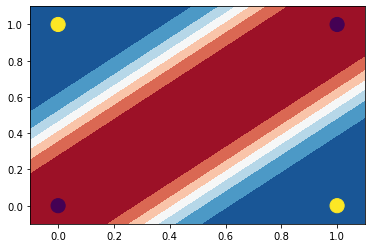

In [273]:
# Decision Boundary
lineX = np.linspace(-0.1,1.1,100)
lineY = np.linspace(-0.1,1.1,100)
xx,yy = np.meshgrid(lineX, lineY)
GridX = np.vstack((xx.ravel(),yy.ravel())).T
_, pred = forward(GridX,w1,w2,b1,b2,activation)

pred = pred.reshape(xx.shape)

plt.contourf(xx,yy,pred, cmap="RdBu")
plt.scatter(X[:,0], X[:,1], c=Y, s=200)
plt.show()